### Illustration of linear error proagation: ISRF perturbation

#### 1. Set working enviroment

In [1]:
import sys
import os
import yaml
import numpy as np
from netCDF4 import Dataset
import matplotlib
# define  path to search for module
sys.path.append("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/")
os.chdir("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp6_isrf/")

print(sys.path)

['/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp6_isrf', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/jochen/pythonenvs/tangoendtoend/lib/python3.10/site-packages', '/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/']


#### 2. import teds modules

In [2]:
from teds.gm import geometry_module
from teds.sgm import geoscene_generation
from teds.sgm import Carbon_radiation_scene_generation
from teds.siml1b import simplified_instrument_model_and_l1b_processor
from teds.l1l2.l1bl2 import level1b_to_level2_processor_RTorCH4, level1b_to_level2_processor
from teds.lib.libNumTools import get_isrf

#### 3. Operational flags

In [3]:
proc_gm     = True
proc_sgmgeo = True
proc_sgmrad = True
proc_siml1b = True
proc_l1bl2  = True

data_read_acoeff = True
data_aly1_acoeff = True
data_aly2_acoeff = True

data_read_bcoeff = True
data_aly1_bcoeff = True
data_aly2_bcoeff = True

req_aly = True

#### 4. GM model

In [4]:
if(proc_gm):
    #configureation file
    gm_config= yaml.safe_load(open('./settings/gm_config.yaml'))
    geometry_module(gm_config)

/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/gm/Tango_Carbon_gm_exp6.0.nc
2024-12-11 16:10:20,810 : teds.lib.lib_utils : gm : 435 : INFO : =>gm calculation finished successfully. 


[16:10:20] =>gm calculation finished successfully. 


#### 5. SGM-GEO

In [5]:
if(proc_sgmgeo):
    sgmgeo_config= yaml.safe_load(open('./settings/sgmgeo_config.yaml'))
    geoscene_generation(sgmgeo_config)

=>sgm geoscene calculation finished successfully


/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/teds/lib/libGM.py:187: RuntimeWarning: invalid value encountered in divide
  cU1 * cU2 * slam / sin_sigma)


#### 6. SGM-RAD

In [6]:
if(proc_sgmrad):
    sgmrad_config= yaml.safe_load(open('./settings/sgmrad_config.yaml'))
    Carbon_radiation_scene_generation(sgmrad_config)

Radiative tranfer simulation...


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

=>Carbon radsgm calculation finished successfully


#### 7. Simplified L1B processor

In [7]:
if(proc_siml1b):
    path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'
    # perturbation of the block-shape with constant fwhm
    nbcoeff = 11
    for ib in range(0,nbcoeff):

        siml1b_config= yaml.safe_load(open('./settings/siml1b_config.yaml'))
        siml1b_config['isrf_settings']['type'] =  'generalized_normal' 
        siml1b_config['isrf_settings']['fwhm'] = 0.45
        siml1b_config['isrf_settings']['bcoeff'] = 0.4 + ib*0.01

        # print('======================================================')
        # print('fwhm: ',siml1b_config['isrf_settings']['fwhm'],' bcoeff: ', siml1b_config['isrf_settings']['bcoeff'])
        # print('======================================================')

        str_bcoeff = "%.3f" % (siml1b_config['isrf_settings']['bcoeff'])
        siml1b_config['io_files']['output_l1b'] = path + 'level1b/Tango_Carbon_l1b_exp6.0_bcoeff'+str_bcoeff + '.nc'
        simplified_instrument_model_and_l1b_processor(siml1b_config)

    # perturbation of the fwhm with constant relative shape (block-shape)
    nacoeff = 15
    for ia in range(0,nacoeff):

        siml1b_config= yaml.safe_load(open('./settings/siml1b_config.yaml'))
        siml1b_config['isrf_settings']['type'] =  'generalized_normal' 
        siml1b_config['isrf_settings']['bcoeff'] = 0.45
        siml1b_config['isrf_settings']['fwhm'] = 0.422 + 0.004*ia
                    
    #    print('======================================================')
    #    print('fwhm: ',siml1b_config['isrf_settings']['fwhm'],' bcoeff: ', siml1b_config['isrf_settings']['bcoeff'])
    #    print('======================================================')
 
        str_acoeff = "%.3f" % (siml1b_config['isrf_settings']['fwhm'])
        siml1b_config['io_files']['output_l1b'] = path + 'level1b/Tango_Carbon_l1b_exp6.0_acoeff'+str_acoeff + '.nc'
        simplified_instrument_model_and_l1b_processor(siml1b_config)

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 19.53it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 22.01it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 18.20it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 25.22it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 28.72it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 24.47it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 36.06it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 26.83it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 19.63it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 121.21it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 19.38it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 22.20it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 35.46it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 22.71it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 32.61it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 34.62it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 20.50it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 42.40it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 23.41it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 26.20it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 20.22it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 20.44it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 19.89it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 23.12it/s]


=>siml1b calculation finished successfully


100%|██████████| 1/1 [00:00<00:00, 24.88it/s]

=>siml1b calculation finished successfully


#### 8. L2 processing of the $\mathrm{CO_2}$ and $\mathrm{CH_4}$ proxy product

* First reference simulation with gain simulations
* Loop over different isrf perturbations (acoeff and bcoeff of the generalized normal distribution)

In [8]:

if(proc_l1bl2):
    path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'
    l1bl2_config= yaml.safe_load(open('./settings/l1bl2_config.yaml'))
    l1bl2_config['isrf_settings']['type'] =  'generalized_normal' 
    l1bl2_config['isrf_settings']['fwhm'] = 0.45
    l1bl2_config['isrf_settings']['bcoeff'] = 0.45
    
    nbcoeff = 11
    # perturbation of the block-shape with constant fwhm
    for ib in range(0,nbcoeff):

        bcoeff = 0.4 + ib*0.01
        str_bcoeff = "%.3f" % (bcoeff)

        l1bl2_config['io_files']['input_l1b'] = path + 'level1b/Tango_Carbon_l1b_exp6.0_bcoeff'+str_bcoeff + '.nc'
        l1bl2_config['io_files']['output_l2'] = path + 'level2/Tango_Carbon_l2_exp6.0_bcoeff'+str_bcoeff + '.nc'
        l1bl2_config['io_files']['output_l2_diag'] = path + 'level2/Tango_Carbon_l2_diag_exp6.0_bcoeff'+str_bcoeff + '.nc'
            
        level1b_to_level2_processor(l1bl2_config)

    # perturbation of the fwhm with constant relative shape (block-shape)
    nacoeff = 15
    for ia in range(0,nacoeff):

        fwhm = 0.422 + 0.004*ia
        str_acoeff = "%.3f" % (fwhm)
    
        l1bl2_config['io_files']['input_l1b']      = path + 'level1b/Tango_Carbon_l1b_exp6.0_acoeff'+str_acoeff + '.nc'
        l1bl2_config['io_files']['output_l2']      = path + 'level2/Tango_Carbon_l2_exp6.0_acoeff'+str_acoeff + '.nc'
        l1bl2_config['io_files']['output_l2_diag'] = path + 'level2/Tango_Carbon_l2_exp6.0_diag_acoeff'+str_acoeff + '.nc'

        level1b_to_level2_processor(l1bl2_config)


level 1B to 2 proessor ...


100%|██████████| 1/1 [00:25<00:00, 25.21s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.400.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:26<00:00, 26.13s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.410.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:25<00:00, 25.96s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.420.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:24<00:00, 24.12s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.430.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.33s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.440.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:17<00:00, 17.85s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.450.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.20s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.460.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.11s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.470.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:18<00:00, 18.77s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.480.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:18<00:00, 18.79s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.490.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:20<00:00, 20.67s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_bcoeff0.500.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:20<00:00, 20.54s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.422.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:20<00:00, 20.90s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.426.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:20<00:00, 20.32s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.430.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.40s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.434.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:18<00:00, 18.52s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.438.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.59s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.442.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.36s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.446.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:18<00:00, 18.83s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.450.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:17<00:00, 17.72s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.454.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:18<00:00, 18.08s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.458.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:18<00:00, 18.23s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.462.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:17<00:00, 17.83s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.466.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.76s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.470.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:20<00:00, 20.61s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.474.nc
diag_output
=> l1bl2 finished successfully
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:19<00:00, 19.49s/it]

/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_acoeff0.478.nc
diag_output
=> l1bl2 finished successfully


#### 9. Data analysis: Sensitivity to fwhm (acoeff)

9.1 Read in data incld gains for reference case

In [9]:
#read level-2 product

if(data_read_acoeff):

    import netCDF4 as nc
    from copy import deepcopy
    import matplotlib.pyplot as plt

    sza = [70.0, 60, 50, 40, 30, 20, 10, 0]

    nsza = len(sza)
    nacoeff = 15  
    acoeff = np.arange(0, nacoeff)*0.004 + 0.422
    xco2_proxy = np.zeros([nacoeff, nsza])
    xch4_proxy = np.zeros([nacoeff, nsza])
    xco2_ns    = np.zeros([nacoeff, nsza])
    xch4_ns    = np.zeros([nacoeff, nsza])

    prec_xco2_proxy = np.zeros([nacoeff, nsza])
    prec_xco2_ns    = np.zeros([nacoeff, nsza])
    prec_xch4_ns    = np.zeros([nacoeff, nsza])

    path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'

    for ia in range(nacoeff):    
        str_acoeff = "%.3f" % (acoeff[ia])
        filename = 'level2/Tango_Carbon_l2_exp6.0_acoeff'+str_acoeff+'.nc'
        l2_data = nc.Dataset(path+filename)
        xco2_proxy[ia,:] = deepcopy(l2_data['XCO2 proxy'][:]).flatten()
        xch4_proxy[ia,:] = deepcopy(l2_data['XCH4 proxy'][:]).flatten()
        xco2_ns[ia,:]    = deepcopy(l2_data['non_scattering_retrieval']['XCO2'][:]).flatten()
        xch4_ns[ia,:]    = deepcopy(l2_data['non_scattering_retrieval']['XCH4'][:]).flatten()
        prec_xco2_proxy[ia,:] = deepcopy(l2_data['precision XCO2 proxy'][:]).flatten()
        prec_xco2_ns[ia,:]    = deepcopy(l2_data['non_scattering_retrieval']['precision XCO2'][:]).flatten()
        prec_xch4_ns[ia,:]    = deepcopy(l2_data['non_scattering_retrieval']['precision XCH4'][:]).flatten()
        l2_data.close()

    filename = 'sgm/Tango_Carbon_sgm_atmosphere_exp6.0.nc'
    sgm_data = nc.Dataset(path+filename)
    albedo = deepcopy(sgm_data['albedo B11'][:])
    xco2_true = deepcopy(sgm_data['XCO2'][:]).flatten()
    xch4_true = deepcopy(sgm_data['XCH4'][:]).flatten()
    sgm_data.close()

    xco2_proxy_error = np.zeros([nacoeff, nsza])
    xch4_proxy_error = np.zeros([nacoeff, nsza])
    xco2_ns_error = np.zeros([nacoeff, nsza])
    xch4_ns_error = np.zeros([nacoeff, nsza])

    for ia in range(nacoeff):
        xco2_proxy_error[ia, :] = (xco2_proxy[ia, :]-xco2_true[:])/xco2_true[:]*100.
        xco2_ns_error[ia, :]    = (xco2_ns[ia, :]-xco2_true[:])/xco2_true[:]*100.
        xch4_ns_error[ia, :]    = (xch4_ns[ia, :]-xch4_true[:])/xch4_true[:]*100.

    # read gains from diag files

    filel2_diag = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_diag_acoeff0.450.nc'
    diag= Dataset(filel2_diag, mode='r')
    gain_ch4_ns    = diag['gain CH4'][:]
    gain_co2_ns    = diag['gain CO2'][:]

    #diag.variables.keys()

    nn, nsza, nwave = gain_co2_ns.shape
    radiance_ref    = np.zeros([nsza, nwave])
    radiance_ref[:,:] = diag['measurement'][:]
    wave_l1b        = diag['wavelength'][0,0,:]
    gain_co2_proxy  = np.zeros([nn,nsza,nwave])
    gain_ch4_proxy  = np.zeros([nn,nsza,nwave])

    for isza in range(nsza):
        gain_co2_proxy[0,isza,:] = (gain_co2_ns[0,isza,:]/xco2_ns[0,isza] - gain_ch4_ns[0,isza,:]/xch4_ns[0,isza])*xco2_proxy[0,isza]
        gain_ch4_proxy[0,isza,:] = (gain_ch4_ns[0,isza,:]/xch4_ns[0,isza] - gain_co2_ns[0,isza,:]/xco2_ns[0,isza])*xch4_proxy[0,isza]

    # simulated perturation of the measurement due to perturbed isrf, i.e., perturbation of the acoeff and bcoeff of 
    # the generalized normal distribution 
    filen_sgmrad = path + 'sgm/Tango_Carbon_sgm_radiance_exp6.0.nc'
    sgmrad = Dataset(filen_sgmrad)
    wave_lbl = sgmrad['wavelength'][:].data
    radiance_per_acoeff = np.zeros([nacoeff,nsza,nwave])

    isrf_config = {}
    isrf_config['type']   = 'generalized_normal' 
    isrf_config['bcoeff'] = 0.45
    for ia in range(nacoeff):
        isrf_config['fwhm'] = 0.422 + 0.004*ia
        isrf_convolution = get_isrf(wave_l1b, wave_lbl, isrf_config)
        for isza in range(nsza):
            radiance_per_acoeff[ia, isza, :] = isrf_convolution(sgmrad['radiance'][0, isza, :].data)

9.2 Plot the induced L2 error (fully iterated) for the fwhm perturbation (a-coefficient) as a function of SZA 

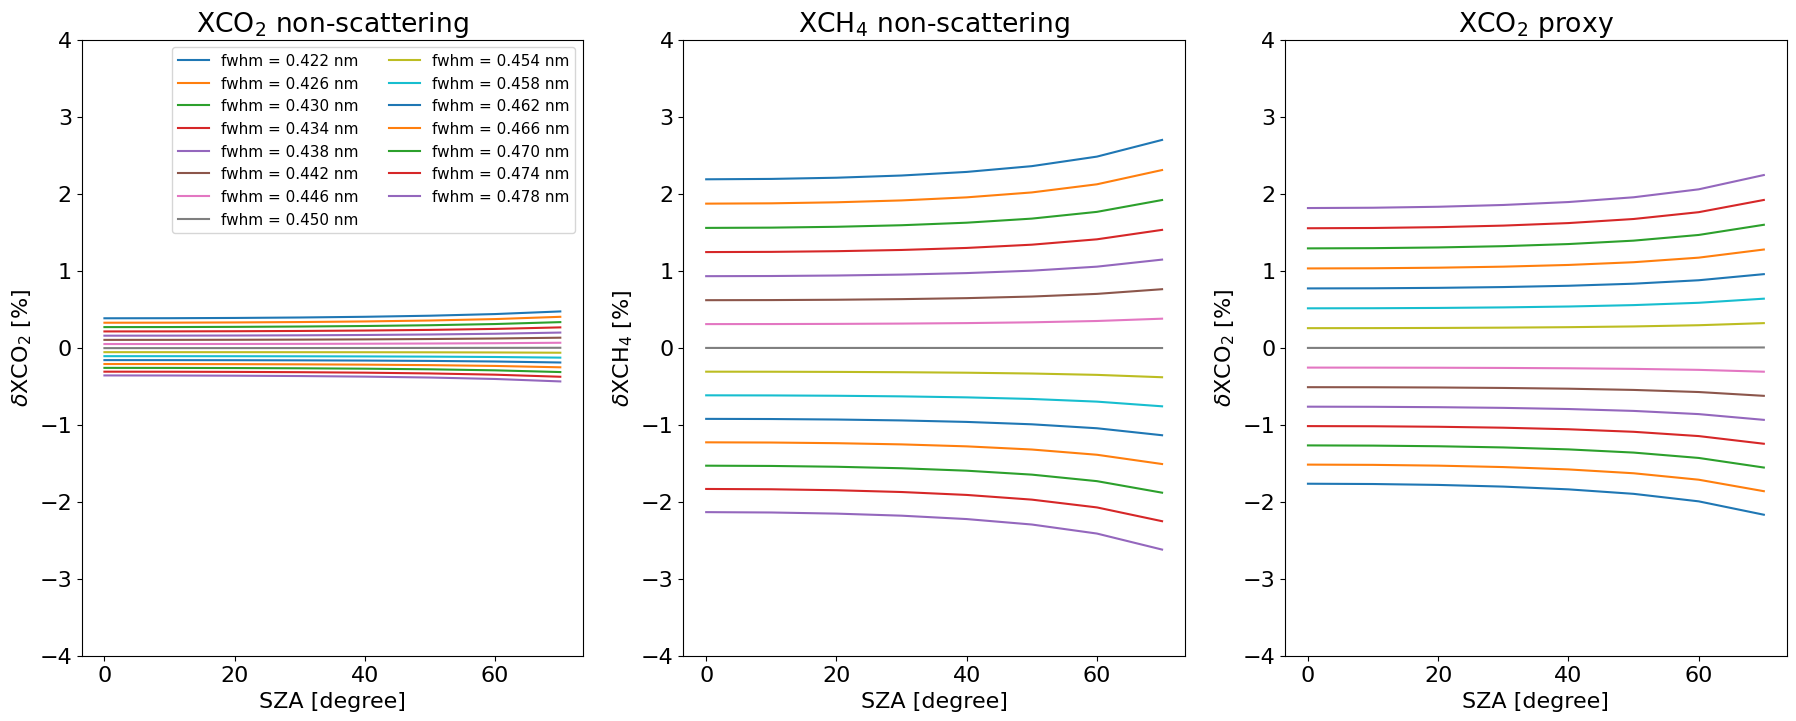

In [10]:
if(data_aly1_acoeff):
    fig = plt.figure(figsize=(22,8), dpi=100,)
    plt.rcParams.update({'font.size': 16})    
    ax1 = fig.add_subplot(131)
        
    for ic in range(15):
        ax1.plot(sza, xco2_ns_error[ic, :], label='fwhm = '+"{:.3f}".format(acoeff[ic])+' nm')
    ax1.set_xlabel('SZA [degree]')
    ax1.set_ylabel('$\delta$XCO$_2$ [%]')
    ax1.legend(fontsize = '11', ncol = 2)
    ax1.set_ylim([-4., 4.])
    ax1.set_title('XCO$_2$ non-scattering')

    ax2 = fig.add_subplot(132)
    ax2.set_xlabel('SZA [degree]')
    ax2.set_ylabel('$\delta$XCH$_4$ [%]')
    ax2.set_ylim([-4., 4.])
    ax2.set_title('XCH$_4$ non-scattering')
    for ic in range(15):
        ax2.plot(sza, xch4_ns_error[ic, :], label='b = '+"{:.3f}".format(acoeff[ic]))

    ax3 = fig.add_subplot(133)

    ax3.set_xlabel('SZA [degree]')
    ax3.set_ylabel('$\delta$XCO$_2$ [%]')
    ax3.set_ylim([-4., 4.])
    ax3.set_title('XCO$_2$ proxy')
    for ic in range(15):
        ax3.plot(sza, xco2_proxy_error[ic, :], label='b = '+"{:.3f}".format(acoeff[ic]))
    plt.savefig('plots/exp6_isrf_sza.png',)

9.3 Plot the L2 induced error as a function of perturbed fwhm for the itertative solution and for linear error propagation.

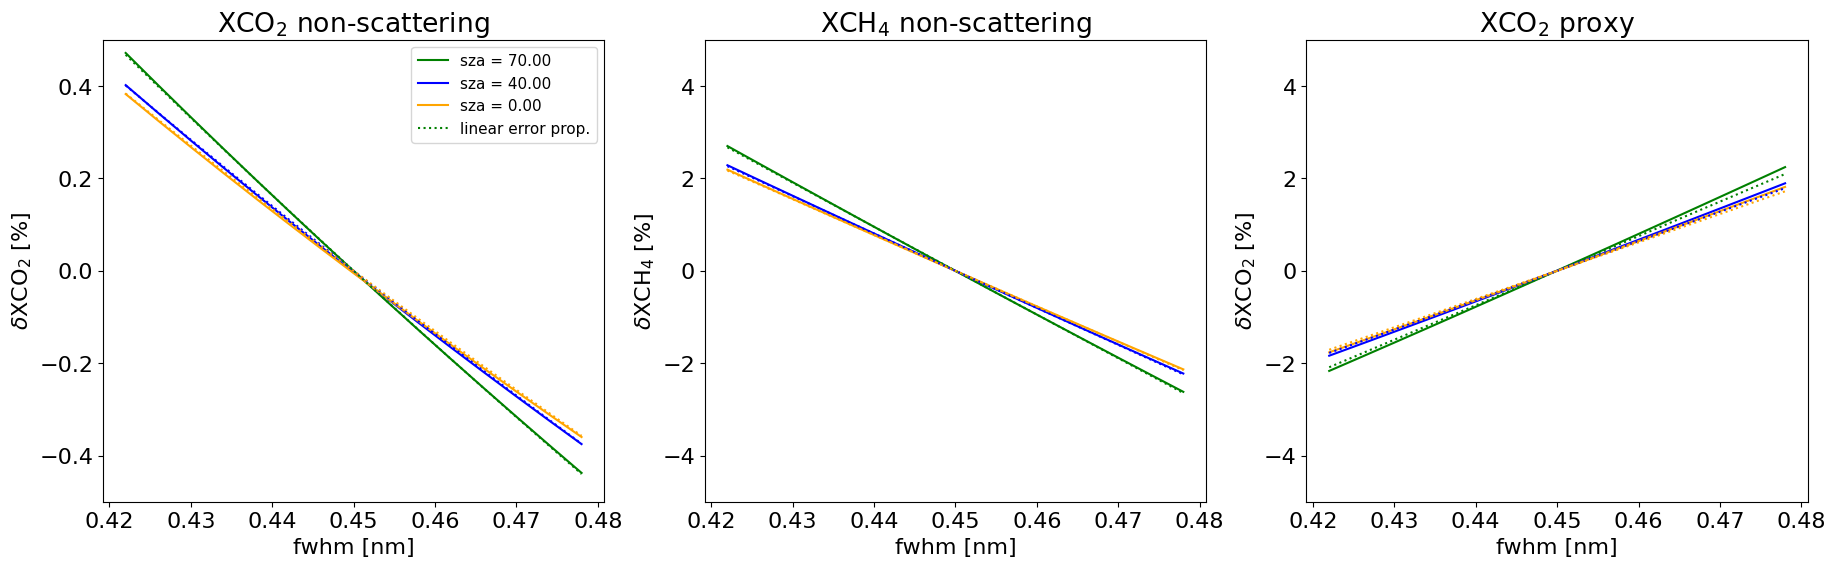

In [11]:
if(data_aly2_acoeff):

    nacoeff,nsza,nwave = radiance_per_acoeff.shape

    delta_XCO2ns    = np.zeros([nacoeff,nsza])
    delta_XCH4ns    = np.zeros([nacoeff,nsza])
    delta_XCO2      = np.zeros([nacoeff,nsza])

    for ia in range(nacoeff):
        for isza in range(nsza):
            deltarad = radiance_per_acoeff[ia,isza,:]-radiance_ref[isza,:]
            delta_XCO2ns[ia,isza] = np.dot(gain_co2_ns[0,isza,:],deltarad)/xco2_true[isza]*100.
            delta_XCH4ns[ia,isza] = np.dot(gain_ch4_ns[0,isza,:],deltarad)/xch4_true[isza]*100.
            delta_XCO2[ia, isza]  = np.dot(gain_co2_proxy[0,isza,:],deltarad)/xco2_true[isza]*100.

    fig = plt.figure(figsize=(22,6), dpi=100,)
    plt.rcParams.update({'font.size': 16})
    
    ax1 = fig.add_subplot(131)

    ax1.plot(acoeff, xco2_ns_error[:, 0], label='sza = '+"{:.2f}".format(sza[0]), color = 'green')
    ax1.plot(acoeff, xco2_ns_error[:, 3], label='sza = '+"{:.2f}".format(sza[3]), color = 'blue')
    ax1.plot(acoeff, xco2_ns_error[:, 7], label='sza = '+"{:.2f}".format(sza[7]), color = 'orange')

    ax1.plot(acoeff, delta_XCO2ns[:, 0], label='linear error prop.',linestyle = ':', color = 'green')
    ax1.plot(acoeff, delta_XCO2ns[:, 3], linestyle = ':', color = 'blue')
    ax1.plot(acoeff, delta_XCO2ns[:, 7], linestyle = ':', color = 'orange')

    ax1.set_xlabel('fwhm [nm]')
    ax1.set_ylabel('$\delta$XCO$_2$ [%]')
    ax1.legend(fontsize = '11')
    ax1.set_ylim([-0.5, 0.5])
    ax1.set_title('XCO$_2$ non-scattering')
    
    ax2 = fig.add_subplot(132)
    
    ax2.set_xlabel('fwhm [nm]')
    ax2.set_ylabel('$\delta$XCH$_4$ [%]')
    ax2.set_ylim([-5., 5.])
    ax2.set_title('XCH$_4$ non-scattering')

    ax2.plot(acoeff, xch4_ns_error[:, 0], label='sza = '+"{:.2f}".format(sza[0]), color = 'green')
    ax2.plot(acoeff, xch4_ns_error[:, 3], label='sza = '+"{:.2f}".format(sza[3]), color = 'blue')
    ax2.plot(acoeff, xch4_ns_error[:, 7], label='sza = '+"{:.2f}".format(sza[7]), color = 'orange')

    ax2.plot(acoeff, delta_XCH4ns[:, 0], linestyle = ':', color = 'green')
    ax2.plot(acoeff, delta_XCH4ns[:, 3], linestyle = ':', color = 'blue')
    ax2.plot(acoeff, delta_XCH4ns[:, 7], linestyle = ':', color = 'orange')
    ax3 = fig.add_subplot(133)
    
    ax3.set_xlabel('fwhm [nm]')
    ax3.set_ylabel('$\delta$XCO$_2$ [%]')
    ax3.set_ylim([-5., 5.])
    ax3.set_title('XCO$_2$ proxy')
    
    ax3.plot(acoeff, xco2_proxy_error[:, 0], label='sza = '+"{:.2f}".format(sza[0]), color = 'green')
    ax3.plot(acoeff, xco2_proxy_error[:, 3], label='sza = '+"{:.2f}".format(sza[3]), color = 'blue')
    ax3.plot(acoeff, xco2_proxy_error[:, 7], label='sza = '+"{:.2f}".format(sza[7]), color = 'orange')

    ax3.plot(acoeff, delta_XCO2[:, 0], label='sza = '+"{:.2f}".format(sza[0]),linestyle = ':', color = 'green')
    ax3.plot(acoeff, delta_XCO2[:, 3], label='sza = '+"{:.2f}".format(sza[3]),linestyle = ':', color = 'blue')
    ax3.plot(acoeff, delta_XCO2[:, 7], label='sza = '+"{:.2f}".format(sza[7]),linestyle = ':', color = 'orange')

    plt.savefig('plots/exp6_isrf_fwhm.png',)

#### 10. Data analysis: Sensitivity to fwhm (bcoeff)

10.1 Read in data incld gains for reference case

In [12]:
if(data_read_bcoeff):

    path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'
    za = [70., 60, 50, 40, 30, 20, 10, 0]
    nsza = len(sza)

    nbcoeff = 11
    bcoeff = np.arange(0, nbcoeff)*0.01 + 0.4
                    
    xco2_proxy = np.zeros([nbcoeff, nsza])
    xch4_proxy = np.zeros([nbcoeff, nsza])
    xco2_ns    = np.zeros([nbcoeff, nsza])
    xch4_ns    = np.zeros([nbcoeff, nsza])

    precision_xco2_proxy = np.zeros([nbcoeff, nsza])
    precision_xco2_ns    = np.zeros([nbcoeff, nsza])
    precision_xch4_ns    = np.zeros([nbcoeff, nsza])

    for ib in range(nbcoeff):    

        str_bcoeff = "%.3f" % (bcoeff[ib])
        filename = 'level2/Tango_Carbon_l2_exp6.0_bcoeff'+str_bcoeff+'.nc'
        l2_data = nc.Dataset(path+filename)

        xco2_proxy[ib, :] = deepcopy(l2_data['XCO2 proxy'][:])
        xch4_proxy[ib, :] = deepcopy(l2_data['XCH4 proxy'][:])

        xco2_ns[ib,:]    = deepcopy(l2_data['non_scattering_retrieval']['XCO2'][:]).flatten()
        xch4_ns[ib,:]    = deepcopy(l2_data['non_scattering_retrieval']['XCH4'][:]).flatten()
        prec_xco2_proxy[ib,:] = deepcopy(l2_data['precision XCO2 proxy'][:]).flatten()
        prec_xco2_ns[ib,:]    = deepcopy(l2_data['non_scattering_retrieval']['precision XCO2'][:]).flatten()
        prec_xch4_ns[ib,:]    = deepcopy(l2_data['non_scattering_retrieval']['precision XCH4'][:]).flatten()
        l2_data.close()

    filename = 'sgm/Tango_Carbon_sgm_atmosphere_exp6.0.nc'
    sgm_data = nc.Dataset(path+filename)
    xco2_true = deepcopy(sgm_data['XCO2'][:]).flatten()
    xch4_true = deepcopy(sgm_data['XCH4'][:]).flatten()
    sgm_data.close()

    xco2_proxy_error = np.zeros([nbcoeff, nsza])
    xch4_proxy_error = np.zeros([nbcoeff, nsza])
    xco2_ns_error = np.zeros([nbcoeff, nsza])
    xch4_ns_error = np.zeros([nbcoeff, nsza])

    for ib in range(nbcoeff):
            xco2_proxy_error[ib, :] = (xco2_proxy[ib, :]-xco2_true[:])/xco2_true[:]*100.
            xch4_proxy_error[ib, :] = (xch4_proxy[ib, :]-xch4_true[:])/xch4_true[:]*100.
            xco2_ns_error[ib, :] = (xco2_ns[ib, :]-xco2_true[:])/xco2_true[:]*100.
            xch4_ns_error[ib, :] = (xch4_ns[ib, :]-xch4_true[:])/xch4_true[:]*100.

    # read gains from diag files

    filel2_diag = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp6.0_diag_acoeff0.450.nc'
    diag= Dataset(filel2_diag, mode='r')
    gain_ch4_ns    = diag['gain CH4'][:]
    gain_co2_ns    = diag['gain CO2'][:]
    
    # diag.variables.keys()

    nn, nsza, nwave = gain_co2_ns.shape
    radiance_ref    = np.zeros([nsza, nwave])
    radiance_ref[:,:] = diag['measurement'][:]
    wave_l1b        = diag['wavelength'][0,0,:]
    gain_co2_proxy  = np.zeros([nn,nsza,nwave])
    gain_ch4_proxy  = np.zeros([nn,nsza,nwave])

    for isza in range(nsza):
        gain_co2_proxy[0,isza,:] = (gain_co2_ns[0,isza,:]/xco2_ns[0,isza] - gain_ch4_ns[0,isza,:]/xch4_ns[0,isza])*xco2_proxy[0,isza]
        gain_ch4_proxy[0,isza,:] = (gain_ch4_ns[0,isza,:]/xch4_ns[0,isza] - gain_co2_ns[0,isza,:]/xco2_ns[0,isza])*xch4_proxy[0,isza]

    # simulated perturation of the measurement due to perturbed isrf, i.e., perturbation of the acoeff and bcoeff of 
    # the generalized normal distribution 
    filen_sgmrad = path + 'sgm/Tango_Carbon_sgm_radiance_exp6.0.nc'
    sgmrad = Dataset(filen_sgmrad)
    wave_lbl = sgmrad['wavelength'][:].data
    radiance_per_bcoeff = np.zeros([nbcoeff,nsza,nwave])

    isrf_config = {}
    isrf_config['type']   = 'generalized_normal' 
    isrf_config['fwhm'] = 0.45
    for ib in range(nbcoeff):
        isrf_config['bcoeff'] = 0.4 + ib*0.01
        isrf_convolution = get_isrf(wave_l1b, wave_lbl, isrf_config)
        for isza in range(nsza):
            radiance_per_bcoeff[ib, isza, :] = isrf_convolution(sgmrad['radiance'][0, isza, :].data)

10.2 Plot the induced L2 error (fully iterated) for the fwhm perturbation (b-coefficient) as a function of SZA

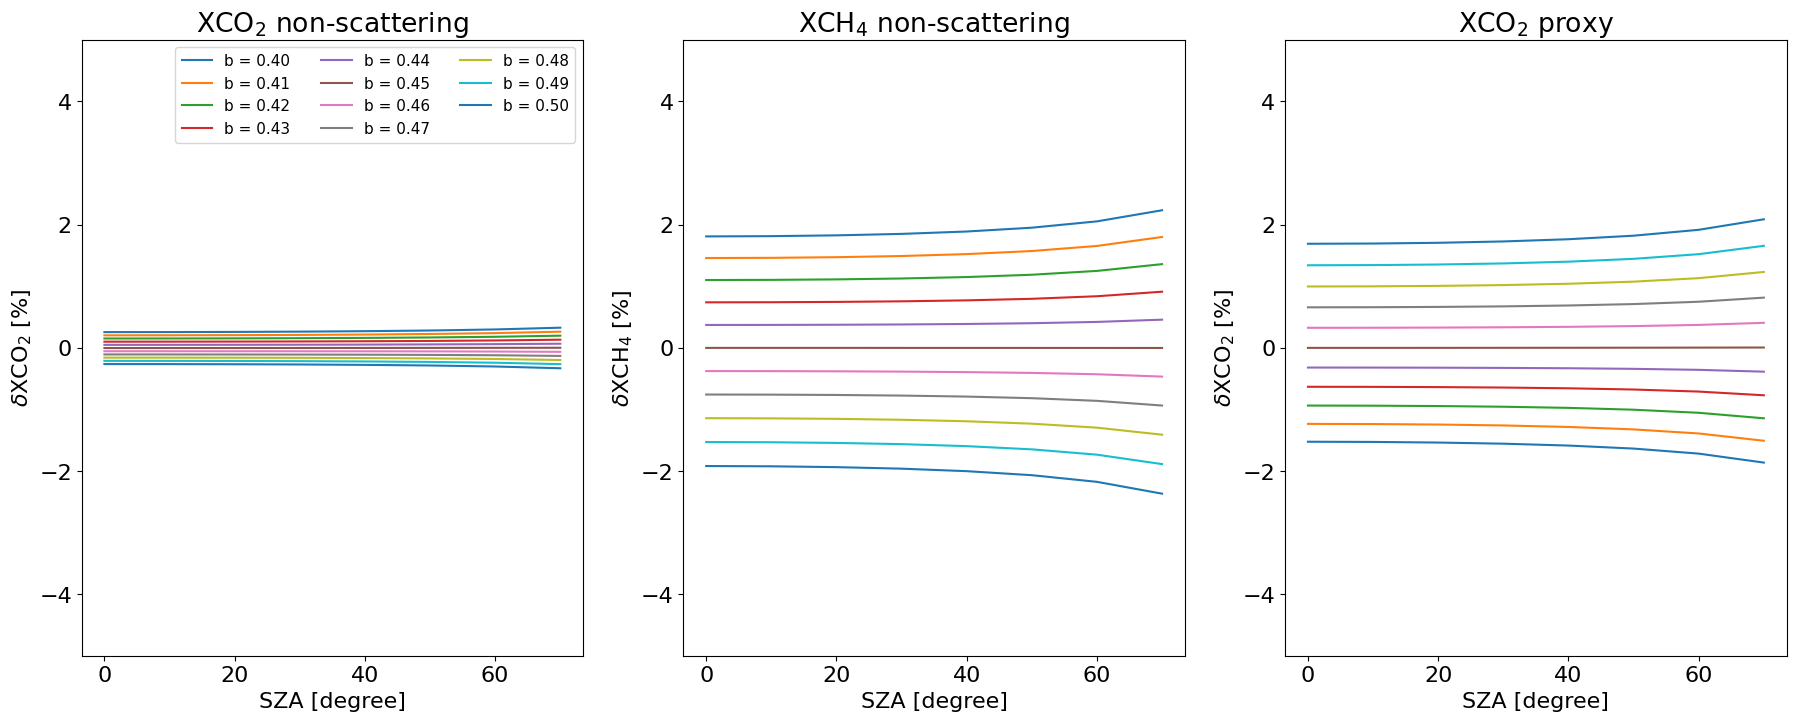

In [13]:
if(data_aly1_bcoeff):
    fig = plt.figure(figsize=(22,8), dpi=100,)
    plt.rcParams.update({'font.size': 16})

    ax1 = fig.add_subplot(131)
    for ib in range(11):
        ax1.plot(sza, xco2_ns_error[ib, :], label='b = '+"{:.2f}".format(bcoeff[ib]))
    ax1.set_xlabel('SZA [degree]')
    ax1.set_ylabel('$\delta$XCO$_2$ [%]')
    ax1.legend(fontsize = '11', ncol = 3)
    ax1.set_ylim([-5., 5.])
    ax1.set_title('XCO$_2$ non-scattering')

    ax2 = fig.add_subplot(132)

    ax2.set_xlabel('SZA [degree]')
    ax2.set_ylabel('$\delta$XCH$_4$ [%]')
    ax2.set_ylim([-5., 5.])
    ax2.set_title('XCH$_4$ non-scattering')
    for ib in range(11):
        ax2.plot(sza, xch4_ns_error[ib, :], label='b = '+"{:.2f}".format(bcoeff[ib]))

    ax3 = fig.add_subplot(133)

    ax3.set_xlabel('SZA [degree]')
    ax3.set_ylabel('$\delta$XCO$_2$ [%]')
    ax3.set_ylim([-5., 5.])
    ax3.set_title('XCO$_2$ proxy')
    for ib in range(11):
        ax3.plot(sza, xco2_proxy_error[ib, :], label='b = '+"{:.2f}".format(bcoeff[ib]))
    plt.savefig('plots/exp6_isrf_bcoeff_sza.png',)

10.3 Plot the L2 induced error as a function of perturbed fwhm for the itertative solution and for linear error propagation.

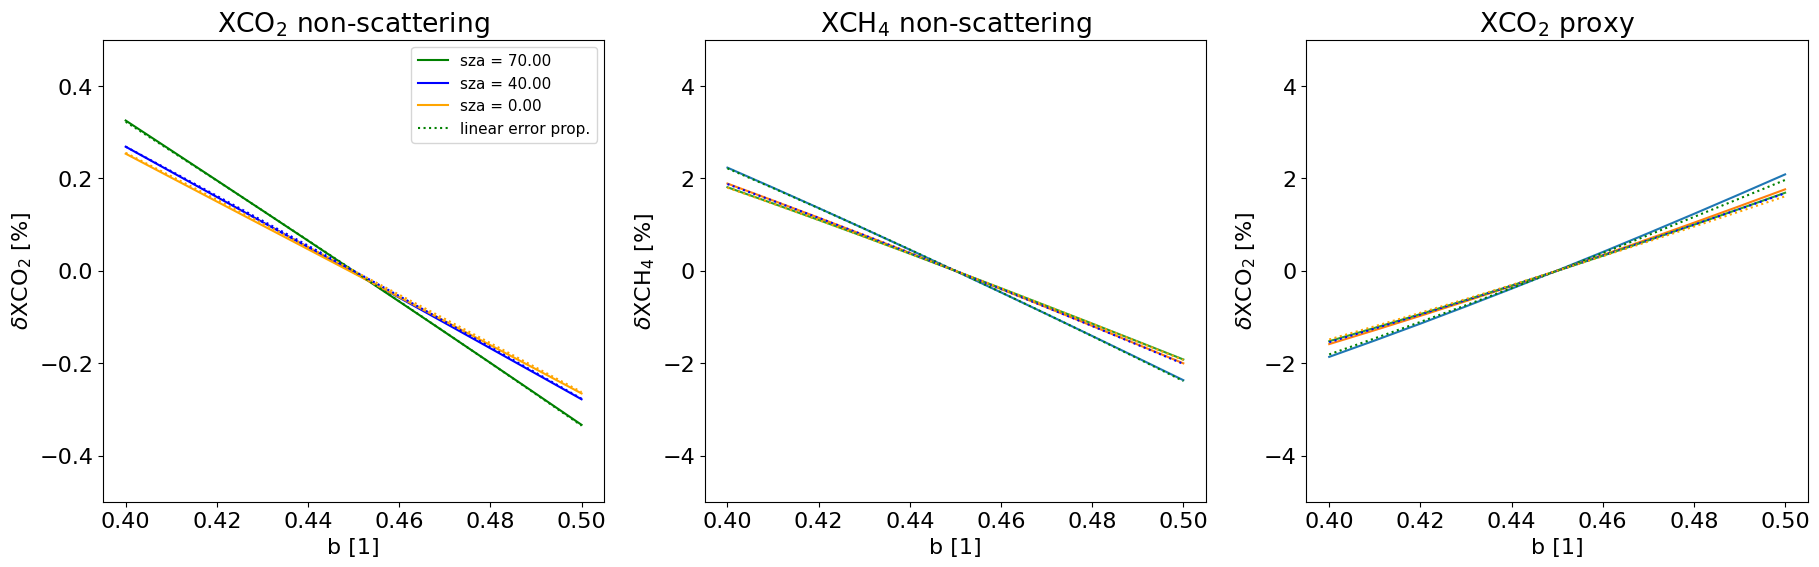

In [14]:
if(data_aly2_bcoeff):

    nbcoeff,nsza,nwave = radiance_per_bcoeff.shape

    delta_XCO2ns    = np.zeros([nbcoeff,nsza])
    delta_XCH4ns    = np.zeros([nbcoeff,nsza])
    delta_XCO2      = np.zeros([nbcoeff,nsza])

    for ib in range(nbcoeff):
        for isza in range(nsza):
            deltarad = radiance_per_bcoeff[ib,isza,:]-radiance_ref[isza,:]
            delta_XCO2ns[ib,isza] = np.dot(gain_co2_ns[0,isza,:],deltarad)/xco2_true[isza]*100.
            delta_XCH4ns[ib,isza] = np.dot(gain_ch4_ns[0,isza,:],deltarad)/xch4_true[isza]*100.
            delta_XCO2[ib, isza]  = np.dot(gain_co2_proxy[0,isza,:],deltarad)/xco2_true[isza]*100.

    fig = plt.figure(figsize=(22,6), dpi=100,)
    plt.rcParams.update({'font.size': 16})
    
    ax1 = fig.add_subplot(131)

    ax1.plot(bcoeff, xco2_ns_error[:, 0], label='sza = '+"{:.2f}".format(sza[0]), color = 'green')
    ax1.plot(bcoeff, xco2_ns_error[:, 3], label='sza = '+"{:.2f}".format(sza[3]), color = 'blue')
    ax1.plot(bcoeff, xco2_ns_error[:, 7], label='sza = '+"{:.2f}".format(sza[7]), color = 'orange')

    ax1.plot(bcoeff, delta_XCO2ns[:, 0], label='linear error prop.',linestyle = ':', color = 'green')
    ax1.plot(bcoeff, delta_XCO2ns[:, 3], linestyle = ':', color = 'blue')
    ax1.plot(bcoeff, delta_XCO2ns[:, 7], linestyle = ':', color = 'orange')

    ax1.set_xlabel('b [1]')
    ax1.set_ylabel('$\delta$XCO$_2$ [%]')
    ax1.legend(fontsize = '11')
    ax1.set_ylim([-0.5, 0.5])
    ax1.set_title('XCO$_2$ non-scattering')
    
    ax2 = fig.add_subplot(132)
    
    ax2.set_xlabel('b [1]')
    ax2.set_ylabel('$\delta$XCH$_4$ [%]')
    ax2.set_ylim([-5., 5.])
    ax2.set_title('XCH$_4$ non-scattering')

    ax2.plot(bcoeff, xch4_ns_error[:, 0], label='sza = '+"{:.2f}".format(sza[0]))
    ax2.plot(bcoeff, xch4_ns_error[:, 3], label='sza = '+"{:.2f}".format(sza[3]))
    ax2.plot(bcoeff, xch4_ns_error[:, 7], label='sza = '+"{:.2f}".format(sza[7]))

    ax2.plot(bcoeff, delta_XCH4ns[:, 0], linestyle = ':', color = 'green')
    ax2.plot(bcoeff, delta_XCH4ns[:, 3], linestyle = ':', color = 'blue')
    ax2.plot(bcoeff, delta_XCH4ns[:, 7], linestyle = ':', color = 'orange')
    ax3 = fig.add_subplot(133)
    
    ax3.set_xlabel('b [1]')
    ax3.set_ylabel('$\delta$XCO$_2$ [%]')
    ax3.set_ylim([-5., 5.])
    ax3.set_title('XCO$_2$ proxy')
    
    ax3.plot(bcoeff, xco2_proxy_error[:, 0], label='sza = '+"{:.2f}".format(sza[0]))
    ax3.plot(bcoeff, xco2_proxy_error[:, 3], label='sza = '+"{:.2f}".format(sza[3]))
    ax3.plot(bcoeff, xco2_proxy_error[:, 7], label='sza = '+"{:.2f}".format(sza[7]))

    ax3.plot(bcoeff, delta_XCO2[:, 0], label='sza = '+"{:.2f}".format(sza[0]),linestyle = ':', color = 'green')
    ax3.plot(bcoeff, delta_XCO2[:, 3], label='sza = '+"{:.2f}".format(sza[3]),linestyle = ':', color = 'blue')
    ax3.plot(bcoeff, delta_XCO2[:, 7], label='sza = '+"{:.2f}".format(sza[7]),linestyle = ':', color = 'orange')

    plt.savefig('plots/exp6_isrf_bcoeff.png',)

#### 11. Analysis L2 error as a function of the ISRF standard deviation
This is the basis for the TANGO Carbon ISRF requirement

In [15]:
# the generalized normal distribution
import math
def generalized_normal(x, fwhm, b=0.5, deriv=False):
    """Generalized normal distribution.

    :param x: A real value or a numpy array of real values.
    :param float fwhm: Full width at half-maximum.
    :param float b: Shape parameter. Value 0.5 for Gauss, towards 0 for a more
        blocky shape, towards 1 for stronger wings.
    :param bool deriv: If True, give the derivative instead of the
        distribution itself. Default is False.
    :return: Value(s) of generalized normal distribution (or its derivative if
        deriv=True) at `x`, normalized to sum 1 for kernels.
    :rtype: list(float)
    """
    const = np.log(2)**b/(fwhm*math.gamma(1+b))
    y = const*2**(-(2*np.abs(x)/fwhm)**(1/b))
    y /= np.sum(y)
    if deriv:
        y *= -(2/fwhm)**(1/b)*np.log(2)*np.sign(x)*np.abs(x)**(1/b-1)/b
    return y


/tmp/ipykernel_35520/2988825497.py:80: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(A, xco2_error)
/tmp/ipykernel_35520/2988825497.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(std, m*std, 'r', label='line regression', color='grey')


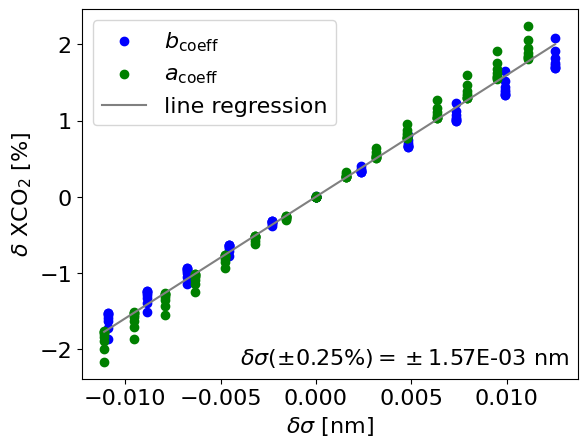

In [16]:
if(req_aly):

    path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'
    sza = [70., 60, 50, 40, 30, 20, 10, 0]
    nsza = len(sza)

    nacoeff = 15
    nbcoeff = 11
    bcoeff = np.arange(0, nbcoeff)*0.01 + 0.4
    acoeff = np.arange(0, nacoeff)*0.004 + 0.422
                    
    # The proxy product for perturbations of the acoeff and bcoeff of the ISRF
    bxco2_proxy = np.zeros([nbcoeff, nsza])
    bxch4_proxy = np.zeros([nbcoeff, nsza])
    axco2_proxy = np.zeros([nacoeff, nsza])
    axch4_proxy = np.zeros([nacoeff, nsza])

    # ISRF standard deviation
    bstd = np.zeros([nbcoeff, nsza])
    astd = np.zeros([nacoeff, nsza])
    # generate a wavelength grid for ISRF calculations centered around zero of a width +- 1 nm. 
    # This is needed to calculate the standard deviation of the ISRF 
    wave = (np.arange(2000)-1000)/1000
    nwave = wave.size

    # Get the proxy product from the L2 files
    for ib in range(nbcoeff):    
        acoeff_ref = 0.45
        isrf = generalized_normal(wave, acoeff_ref, bcoeff[ib])
        bstd[ib,:] = np.sqrt(np.power(wave, 2).dot(isrf))
        str_bcoeff = "%.3f" % (bcoeff[ib])
        filename = 'level2/Tango_Carbon_l2_exp6.0_bcoeff'+str_bcoeff+'.nc'
        dataset = nc.Dataset(path+filename)
        bxco2_proxy[ib, :] = deepcopy(dataset['XCO2 proxy'][:])
        bxch4_proxy[ib, :] = deepcopy(dataset['XCH4 proxy'][:])
        dataset.close()

    for ia in range(nacoeff):    
        bconst_fix = 0.45
        isrf = generalized_normal(wave, acoeff[ia], bconst_fix)
        astd[ia,:] = np.sqrt(np.power(wave, 2).dot(isrf))
        str_acoeff = "%.3f" % (acoeff[ia])
        filename = 'level2/Tango_Carbon_l2_exp6.0_acoeff'+str_acoeff+'.nc'
        dataset = nc.Dataset(path+filename)
        axco2_proxy[ia, :] = deepcopy(dataset['XCO2 proxy'][:])
        axch4_proxy[ia, :] = deepcopy(dataset['XCH4 proxy'][:])
        dataset.close()

    # Get the ground truth from the SGM
    filename = 'sgm/Tango_Carbon_sgm_atmosphere_exp6.0.nc'
    sgm_data = nc.Dataset(path+filename)
    xco2_true = deepcopy(sgm_data['XCO2'][:]).flatten()
    xch4_true = deepcopy(sgm_data['XCH4'][:]).flatten()
    sgm_data.close()

    #proxy error
    axco2_proxy_error = np.zeros([nacoeff, nsza])
    axch4_proxy_error = np.zeros([nacoeff, nsza])
    bxco2_proxy_error = np.zeros([nbcoeff, nsza])
    bxch4_proxy_error = np.zeros([nbcoeff, nsza])

    for ia in range(nacoeff):
            axco2_proxy_error[ia, :] = (axco2_proxy[ia, :]-xco2_true[:])/xco2_true[:]*100.
            axch4_proxy_error[ia, :] = (axch4_proxy[ia, :]-xch4_true[:])/xch4_true[:]*100.

    for ib in range(nbcoeff):
            bxco2_proxy_error[ib, :] = (bxco2_proxy[ib, :]-xco2_true[:])/xco2_true[:]*100.
            bxch4_proxy_error[ib, :] = (bxch4_proxy[ib, :]-xch4_true[:])/xch4_true[:]*100.

    std_ref = bstd[5,0]
    plt.scatter(bstd.flatten()-std_ref,bxco2_proxy_error.flatten(),label='$b_\mathrm{coeff}$', color = 'blue')
    plt.scatter(astd.flatten()-std_ref,axco2_proxy_error.flatten(),label='$a_\mathrm{coeff}$', color = 'green')

    #linear regression through all data points
    std = np.concatenate((astd.flatten(), bstd.flatten(),))
    xco2_error = np.concatenate((axco2_proxy_error.flatten(),bxco2_proxy_error.flatten()))
    std = std - bstd[5,0]
    A = np.vstack([std, np.ones(len(std))]).T
    A = std[:,np.newaxis]
    m, _, _, _ = np.linalg.lstsq(A, xco2_error)
    plt.plot(std, m*std, 'r', label='line regression', color='grey')

    #assume an CO2 proxy error of 0.25 %. Calculate the correspsonding std dev error that is acceptable
    e_max = (0.25)/m 
    plt.text(-0.004,-2.2,'$\delta\sigma(\pm 0.25\%) = \pm $'+"%.2E" % (e_max) + ' nm')
    plt.legend()
    plt.xlabel('$\delta \sigma$ [nm]')
    plt.ylabel('$\delta$ XCO$_2$ [%]')
    plt.savefig('plots/exp6_isrf_std_dev.png',)